## Importing the dependecies

In [3]:
# gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv #it is a wrapper
from stable_baselines import A2C #A2C is RL algorithm

#processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Sumit\anaconda3\envs\tf1.5\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


## MarketWatch GME data

In [4]:
df = pd.read_csv('data/gme.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    object 
 1   Open    253 non-null    float64
 2   High    253 non-null    float64
 3   Low     253 non-null    float64
 4   Close   253 non-null    float64
 5   Volume  253 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


# Coverting date to datetimeformat

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
 5   Volume  253 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 12.0+ KB


In [7]:
# Set index as date
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-25,181.00,217.11,181.00,209.43,"14,887,460"
2021-05-24,175.85,188.46,173.35,180.01,"4,664,348"
2021-05-21,171.00,179.24,170.33,176.79,"3,654,683"
2021-05-20,170.79,174.91,166.90,170.49,"2,478,168"
2021-05-19,171.99,178.98,164.15,168.83,"4,825,905"


In [8]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
#window_size = how many previous timestep data our bot is going to have for referce to make a trade
#frame_bound = specifies how much data we want to pass through our environment we are gonna start at 5th time step 
#and go all the way to the hundredth time_step . 

`Note since our window size is 5 and frame_bound's initial value is also 5 our env.prices will start from very first day i.e. 05/25/2021`

`And if our frame bound's initial value is changed to (10,100) from (5,100) our env.prices will start from 5 day later i.e. 05/18/2021`

In [9]:
print("(env.prices\n",env.prices)
print("env.signal_features\n",env.signal_features) #it shows price and change in price from previous timestep


(env.prices
 [209.43 180.01 176.79 170.49 168.83 180.67 180.6  159.92 164.5  144.79
 146.92 143.22 161.11 161.01 159.48 160.73 162.2  173.59 176.19 178.58
 177.77 168.93 151.18 151.17 158.51 158.53 164.37 154.69 156.44 166.53
 140.99 141.09 158.36 170.26 177.97 184.5  186.95 191.45 189.82 194.46
 181.3  181.   183.75 120.34 181.75 194.49 200.27 201.75 209.81 208.17
 220.14 264.5  260.   265.   246.9  194.5  137.74 132.35 124.18 118.18
 120.4  101.74 108.73  91.71  44.97  46.    40.59  40.69  45.94  49.51
  52.4   51.1   51.2   50.31  60.    63.77  53.5   92.41  90.   225.
 325.   193.6  347.51 147.98  76.79  65.01  43.03  39.12  39.36  35.5
  39.91  31.4   19.95  19.94  17.69  18.08  18.36  17.37  17.25  18.84]
env.signal_features
 [[ 2.0943e+02  0.0000e+00]
 [ 1.8001e+02 -2.9420e+01]
 [ 1.7679e+02 -3.2200e+00]
 [ 1.7049e+02 -6.3000e+00]
 [ 1.6883e+02 -1.6600e+00]
 [ 1.8067e+02  1.1840e+01]
 [ 1.8060e+02 -7.0000e-02]
 [ 1.5992e+02 -2.0680e+01]
 [ 1.6450e+02  4.5800e+00]
 [ 1.4479e+02 -

## Build Environment

 n_state
[[17.69 -2.25]
 [18.08  0.39]
 [18.36  0.28]
 [17.37 -0.99]
 [17.25 -0.12]]
 reward
1.5899999999999999
  done
True
  info
{'total_reward': 165.43999999999997, 'total_profit': 0.855003722634991, 'position': 0}
 


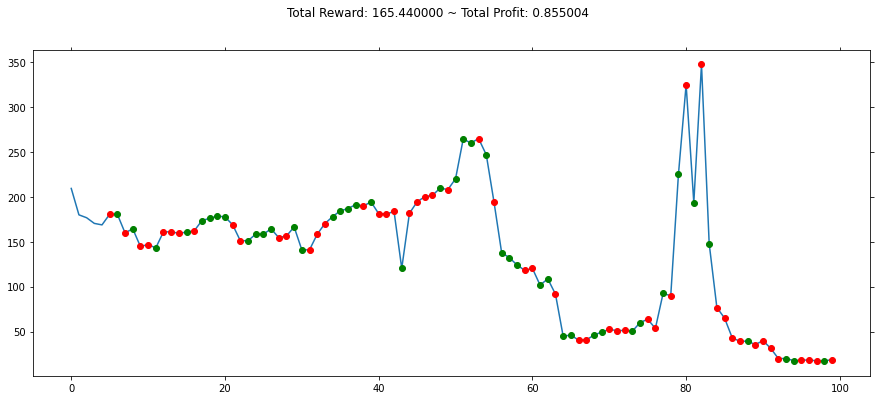

In [10]:
#Taking random steps/ Testing the env
state = env.reset() #it allows us to get initial state
while True:
    action = env.action_space.sample() #looping through each index and taking random action
    n_state,reward,done,info = env.step(action) #applying action to our environment. and storing them in variables
    if done: 
        print(f" n_state\n{n_state}\n reward\n{reward}\n  done\n{done}\n  info\n{info}\n ")
        
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [11]:
env.action_space #we have only 2 action buy and sell

Discrete(2)

## Building Environment and Training

In [15]:
#Wrapping our environment inside of dummyvenEnv
env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)
env  = DummyVecEnv([env_maker])

#we are creatinng env_makr function and putting it inside DummyvecEnv wrapper



In [17]:
#Start Training
model = A2C('MlpLstmPolicy',env,verbose=1) #multilayer-perceptron -lstm policy
model.learn(total_timesteps=100000) #starting to learn





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.0131  |
| fps                | 11       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.09e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000933 |
| fps                | 326      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 1.48     |
---------------------------------
---------------------------------
| explained_variance | 0.00337  |
| fps                | 372     

## Testing the model

In [70]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,2000),window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] #taking observation
    #reshaping using np.newaxis to be able to work with nnon-vectorized environment 
    action,_states = model.predict(obs) #rather than using random action we are using our model and predicting which action it shoudl take
    obs,reward,done,info = env.step(action) 
    if done:
        print("info",info)
        print("action is",action)
        break
    

info {'total_reward': 120.70000000000005, 'total_profit': 0.8483615084064283, 'position': 0}
action is [0]


# Visualising

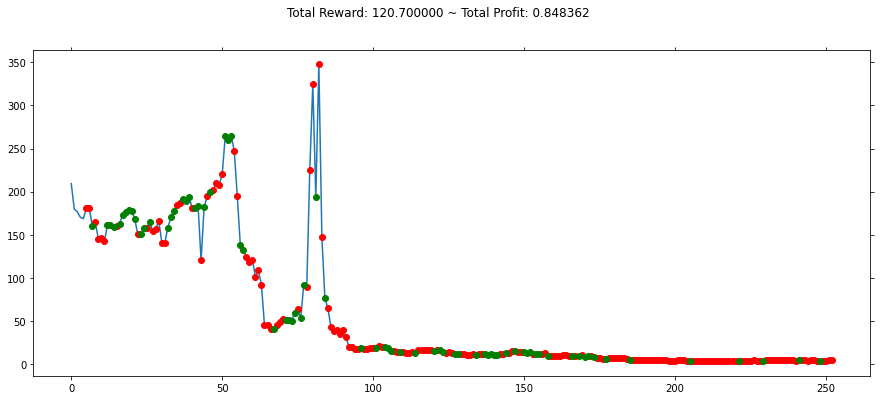

In [71]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [ ]:
! git add GEstocksTrader.ipynb
! git commit -m "14:21/26-05-2021"
! git push origin main